In [1]:
import torch
import torch.nn.functional as F
from PIL import Image, ImageDraw
from torchvision import transforms
import json

In [2]:
test_image = Image.open("example.jpg")

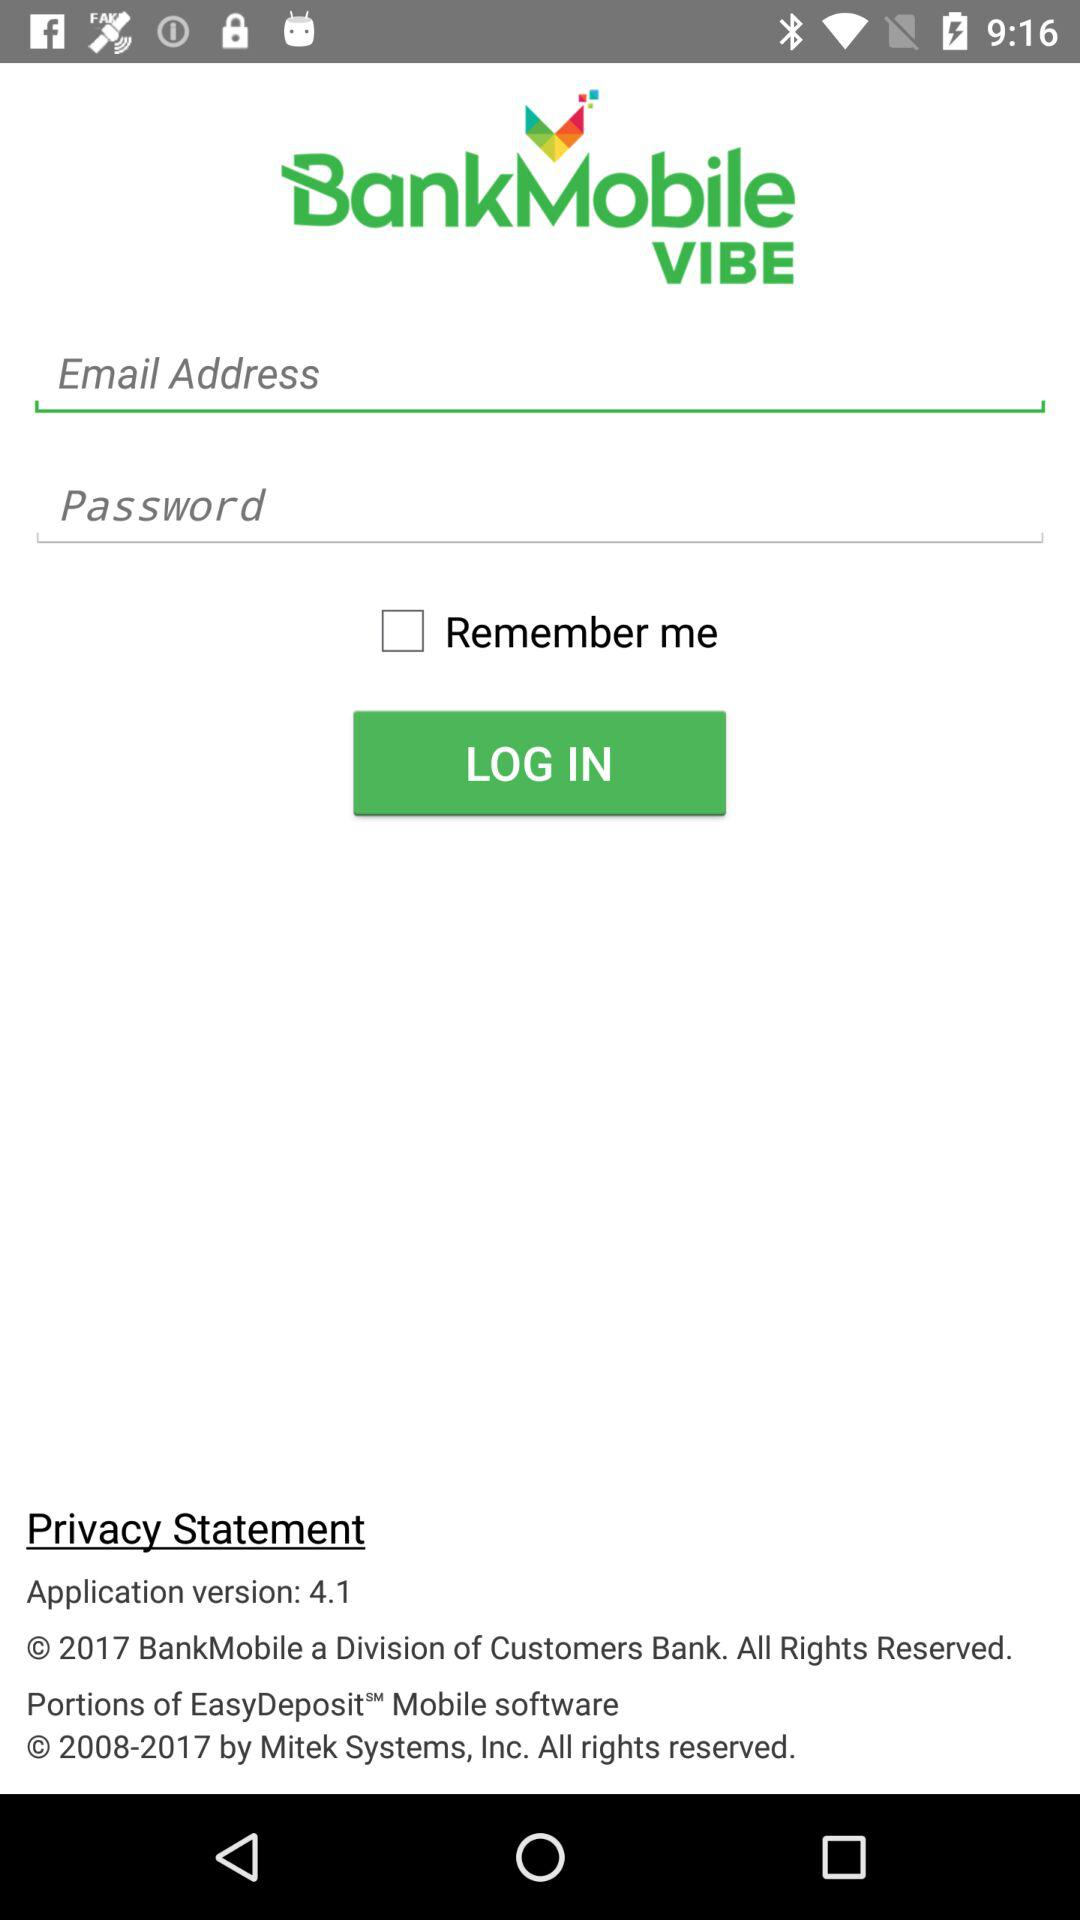

In [3]:
test_image

In [4]:
m = torch.jit.load("../downloads/checkpoints/screenrecognition-web350k-vins.torchscript")

In [5]:
img_transforms = transforms.ToTensor()

In [6]:
class_map_file = "../metadata/screenrecognition/class_map_vins_manual.json"
with open(class_map_file, "r") as f:
    class_map = json.load(f)
    
idx2Label = class_map['idx2Label']

In [7]:
idx2Label

{'1': 'OTHER',
 '2': 'Background Image',
 '3': 'Checked View',
 '4': 'Icon',
 '5': 'Input Field',
 '6': 'Image',
 '7': 'Text',
 '8': 'Text Button',
 '9': 'Page Indicator',
 '10': 'Pop-Up Window',
 '11': 'Sliding Menu',
 '12': 'Switch',
 '0': 'BACKGROUND'}

In [8]:
img_input = img_transforms(test_image)

In [9]:
pred = m([img_input])[1]

C:\Users\Shadow\.virtualenvs\webui-cd6axC8L\lib\site-packages\torch\nn\modules\module.py:1501: UserWarning: torch::jit::fuser::cuda::`anonymous-namespace'::profileViewSize::<lambda_5427972f9b4759d9e109d541659a1cc0>::()::<lambda_038d1319d61ba0529eafdc7d811deec5>::operator () sees varying value in profiling, ignoring and this should be handled by GUARD logic (Triggered internally at ..\third_party\nvfuser\csrc\parser.cpp:3779.)
  return forward_call(*args, **kwargs)


In [10]:
pred

[{'boxes': tensor([[ 358.9742,  710.7007,  725.5630,  821.7147],
          [ 511.7773, 1832.7485,  570.2080, 1891.5826],
          [  58.4526,  355.6970,  321.9284,  383.9386],
          [  60.5058,  490.6002,  266.0498,  523.8673],
          [ 215.9566, 1837.1757,  261.8129, 1885.8264],
          [  47.7972, 1640.0994, 1005.1104, 1759.8136],
          [  37.1738, 1519.1963,  362.6319, 1543.9139],
          [ 289.8968,  140.2676,  792.0190,  254.4015],
          [ 821.1268, 1830.0491,  867.1412, 1881.8177],
          [ 436.5581,  621.9718,  708.2205,  648.8701],
          [  38.5405, 1573.1482,  363.5841, 1609.4116],
          [ 293.2187,  152.2314,  789.8493,  261.2621],
          [ 410.9867,  614.2150,  696.3794,  653.0015],
          [ 379.4091,  603.0540,  422.1208,  652.0380],
          [  18.5033, 1534.2330,  367.5465, 1604.1825],
          [  89.3754,  479.3456, 1062.9506,  544.0707],
          [  11.2989, 1626.8156,  232.5274, 1661.9501],
          [ 379.4091,  603.0540,  422.1

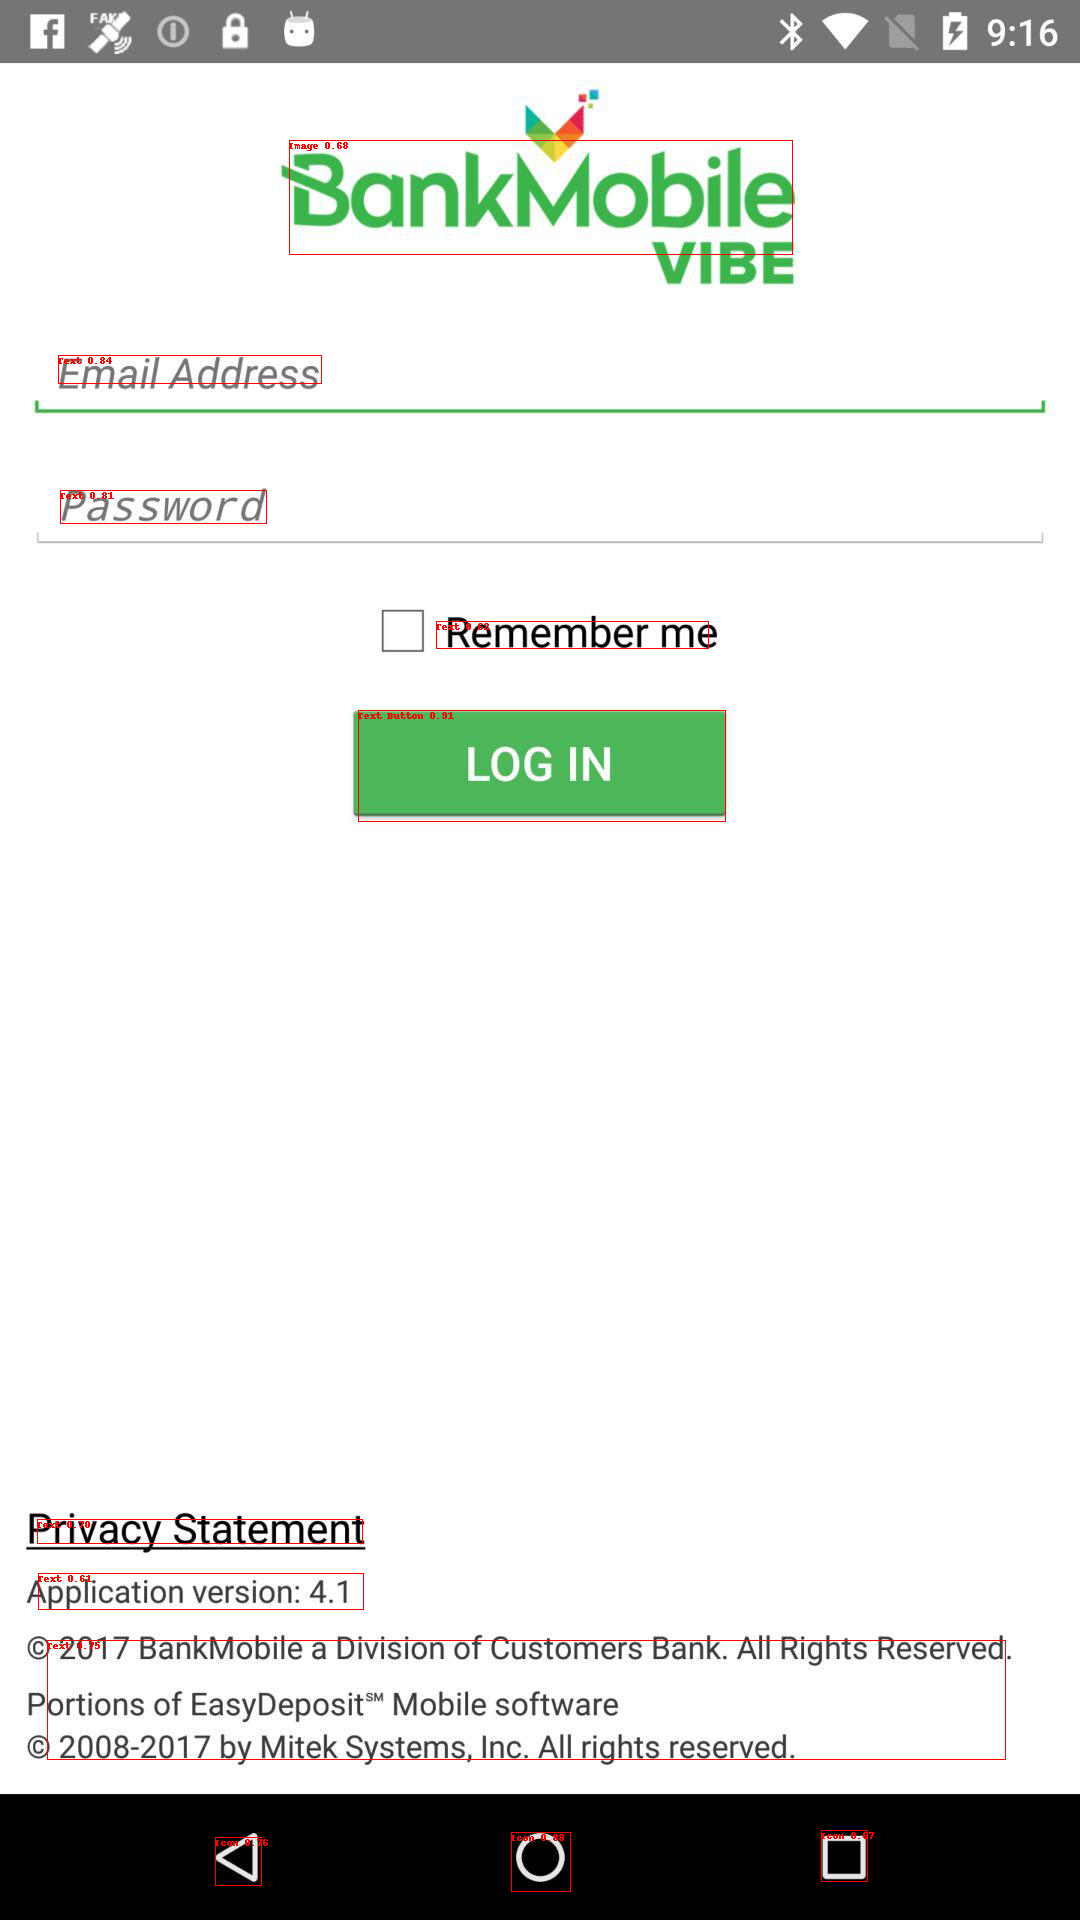

In [11]:
draw = ImageDraw.Draw(test_image)

conf_thresh = 0.5
for i in range(len(pred[0]['boxes'])):
    conf_score = pred[0]['scores'][i]
    if conf_score > conf_thresh:
        x1, y1, x2, y2 = pred[0]['boxes'][i]
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
        draw.rectangle([x1, y1, x2, y2], outline='red')
        draw.text((x1, y1), idx2Label[str(int(pred[0]['labels'][i]))] + " {:.2f}".format(float(conf_score)), fill="red")

test_image